## Data Analytics 2
### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.shape

(400, 5)

In [7]:
df.corr()

C:\Users\mahes\AppData\Local\Temp\ipykernel_18224\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


C:\Users\mahes\AppData\Local\Temp\ipykernel_18224\3644333385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, center = True, cbar = True)


<Axes: >

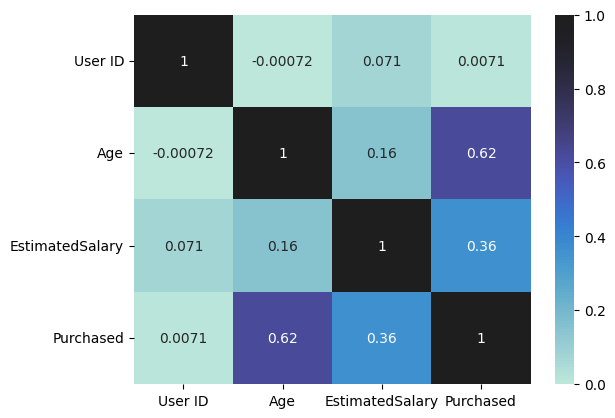

In [8]:
sns.heatmap(df.corr(), annot = True, center = True, cbar = True)

In [12]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size = 0.3, random_state= 0)

In [12]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_test)

### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

print(f"confusion matric: \n {confusion_matrix(y_test,y_pred)}")
print(f"Accuracy_score = {accuracy_score(y_test,y_pred)}")

confusion matric: 
 [[74  5]
 [11 30]]
Accuracy_score = 0.8666666666666667


Text(0.5, 1.0, 'Confusion Matrix')

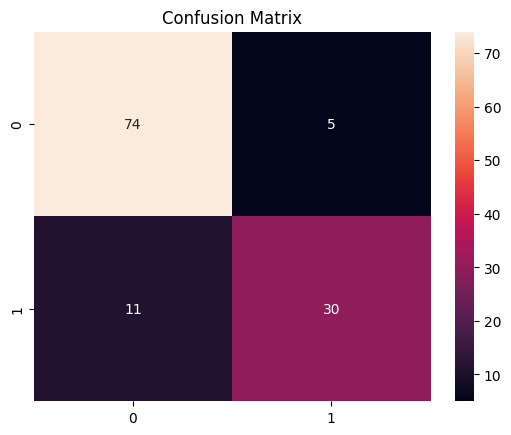

In [16]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True )
plt.title("Confusion Matrix")

In [17]:
print(f"Report: \n {classification_report(y_test,y_pred)}")

Report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120

